In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_excel('/Users/appke/ICTKERALA/iris_new.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [4]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
df['SL'] = df['SL'].fillna(df['SL'].median())

In [18]:
df['SW'] = df['SW'].fillna(df['SW'].median())

In [19]:
df['PL'] = df['PL'].fillna(df['PL'].median())

In [22]:
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [54]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [25]:
X=df.drop(['Classification'],axis=1)
y=df['Classification']

In [26]:
X.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SL      150 non-null    float64
 1   SW      150 non-null    float64
 2   PL      150 non-null    float64
 3   PW      150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Standard Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

In [29]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3
0,-0.934811,1.076275,-1.380791,-1.312977
1,-1.182990,-0.112541,-1.380791,-1.312977
2,-0.066181,0.362985,-1.438808,-1.312977
3,-1.555260,0.125222,-1.322775,-1.312977
4,-1.058900,1.314038,-1.380791,-1.312977


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)

In [33]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [34]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [35]:
print('Accuracy=',accuracy_score(y_test,y_pred))

Accuracy= 0.9666666666666667


### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
metric_k = []
neighbors = np.arange(3,15)

In [38]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k , metric='euclidean')
    classifier.fit(X_train,y_train)
    y_predictions = classifier.predict(X_test)
    accuracy= accuracy_score(y_test,y_predictions)
    metric_k.append(accuracy)

In [39]:
metric_k

[1.0,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

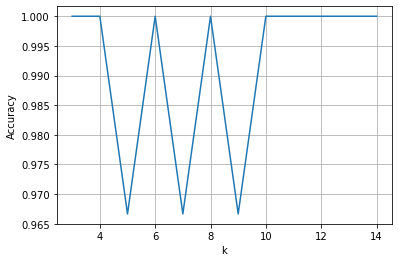

In [40]:
plt.plot(neighbors,metric_k)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [41]:
classifier = KNeighborsClassifier(n_neighbors=3 , metric='euclidean')
classifier.fit(X_train,y_train)
y_predictions = classifier.predict(X_test)

In [42]:
accuracy_score(y_test,y_predictions)

1.0

In [43]:
confusion_matrix(y_test,y_predictions)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

### SVM

In [44]:
from sklearn.svm import SVC

In [45]:
svm_cls = SVC(kernel='linear')
svm_cls = svm_cls.fit(X_train,y_train)
y_pred_svm = svm_cls.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred_svm)

0.9666666666666667

In [47]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt_cls = DecisionTreeClassifier()
dt_cls = dt_cls.fit(X_train,y_train)
y_pred_dt = dt_cls.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred_dt)

1.0

In [50]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(X_train,y_train)
y_pred_rf = rf_cls.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred_rf)

1.0

In [53]:
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])